In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

1. load data

In [2]:
df_original = pd.read_csv("D:/درسی/ML/3th exercise/P2 Dataset/song_sales.csv")
df = df_original.copy()
df

,Unnamed: 0,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_sales
0,0,Boulevard of Broken Dreams,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,35706.49
1,1,In The End,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,32282.58
2,2,Seven Nation Army,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,37173.88
3,3,By The Way,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,36195.62
4,4,How You Remind Me,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,27391.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,18830,Let It Breathe,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300,29347.80
18831,18831,Answers,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265,29347.80
18832,18832,Sudden Love (Acoustic),182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286,11249.99
18833,18833,Gentle on My Mind,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323,26902.15


In [3]:
df = df.drop(['song_name','Unnamed: 0'],axis=1)

In [4]:
def encode_categorical_columns(df):
    df_encoded = df.copy()  
    columns = list(df.columns)
    categorical= []
    
    for col in df.columns:
        unique_values = df[col].nunique()  # number of unique values

        if unique_values <= 5:
            categorical += [col] # store column name in related list
            df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col)
            
        elif 6 <= unique_values <= 12:
            # Frequency Encoding for columns with unique values in the range [6, 12]
            categorical += [col] 
            freq_encoding = df[col].value_counts() / len(df)
            df_encoded[col] = df[col].map(freq_encoding)
            ######################################################
            sub = list(set(columns)-set(categorical))
            
    print(f"Categorical features: {categorical}, Numerical features: {sub}")
    return df_encoded


In [5]:
df = encode_categorical_columns(df)

Categorical features: ['key', 'audio_mode', 'time_signature'], Numerical features: ['danceability', 'audio_mode', 'speechiness', 'audio_valence', 'liveness', 'time_signature', 'loudness', 'energy', 'acousticness', 'song_sales', 'song_duration_ms', 'tempo', 'instrumentalness']


df['song_sale]

In [6]:
data=df['song_sales'].tolist()

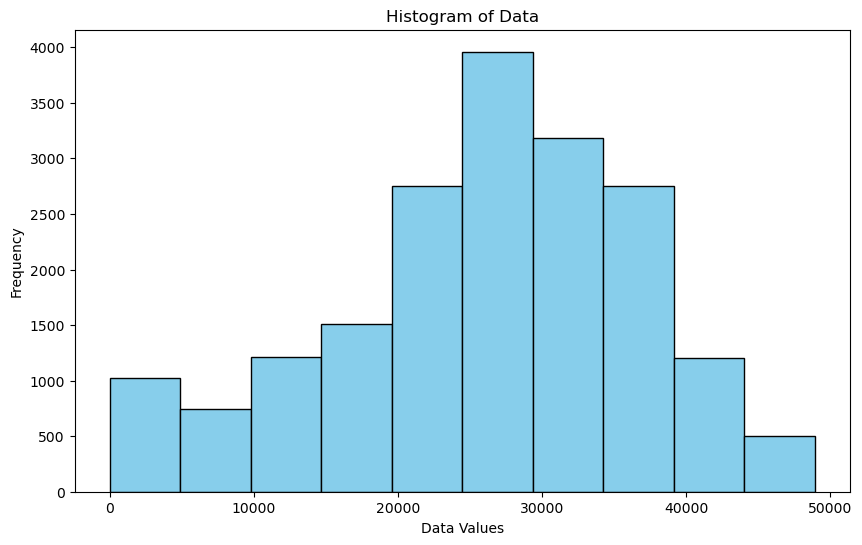

In [7]:
# Plotting the histogram:
plt.figure(figsize=(10, 6)) 
plt.hist(data, bins=10, color='skyblue', edgecolor='black')  # Customize the histogram
plt.title('Histogram of Data')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

plt.show()


In [8]:
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
minimum = np.min(data)
maximum = np.max(data)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum Value: {minimum}")
print(f"Maximum Value: {maximum}")

Mean: 25919.916711441467
Median: 27391.28
Standard Deviation: 10714.42825832798
Minimum Value: 0.0
Maximum Value: 48913.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  18835 non-null  int64  
 1   acousticness      18835 non-null  float64
 2   danceability      18835 non-null  float64
 3   energy            18835 non-null  float64
 4   instrumentalness  18835 non-null  float64
 5   key               18835 non-null  float64
 6   liveness          18835 non-null  float64
 7   loudness          18835 non-null  float64
 8   speechiness       18835 non-null  float64
 9   tempo             18835 non-null  float64
 10  audio_valence     18835 non-null  float64
 11  song_sales        18835 non-null  float64
 12  audio_mode_0      18835 non-null  bool   
 13  audio_mode_1      18835 non-null  bool   
 14  time_signature_0  18835 non-null  bool   
 15  time_signature_1  18835 non-null  bool   
 16  time_signature_3  18835 non-null  bool  

In [10]:
df

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence,song_sales,audio_mode_0,audio_mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,262333,0.005520,0.496,0.682,0.000029,0.071622,0.0589,-4.095,0.0294,167.060,0.474,35706.49,False,True,False,False,False,True,False
1,216933,0.010300,0.542,0.853,0.000000,0.027183,0.1080,-6.407,0.0498,105.256,0.370,32282.58,True,False,False,False,False,True,False
2,231733,0.008170,0.737,0.463,0.447000,0.115848,0.2550,-7.828,0.0792,123.881,0.324,37173.88,False,True,False,False,False,True,False
3,216933,0.026400,0.451,0.970,0.003550,0.115848,0.1020,-4.938,0.1070,122.444,0.198,36195.62,False,True,False,False,False,True,False
4,223826,0.000954,0.447,0.766,0.000000,0.070666,0.1130,-5.065,0.0313,172.011,0.574,27391.28,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,159645,0.893000,0.500,0.151,0.000065,0.084948,0.1110,-16.107,0.0348,113.969,0.300,29347.80,False,True,False,False,False,True,False
18831,205666,0.765000,0.495,0.161,0.000001,0.084948,0.1050,-14.078,0.0301,94.286,0.265,29347.80,True,False,False,False,False,True,False
18832,182211,0.847000,0.719,0.325,0.000000,0.115848,0.1250,-12.222,0.0355,130.534,0.286,11249.99,False,True,False,False,False,True,False
18833,352280,0.945000,0.488,0.326,0.015700,0.027183,0.1190,-12.020,0.0328,106.063,0.323,26902.15,False,True,False,False,False,True,False


 all of columns are numerical and also all are nonnull

3. Outlier Detection and removing

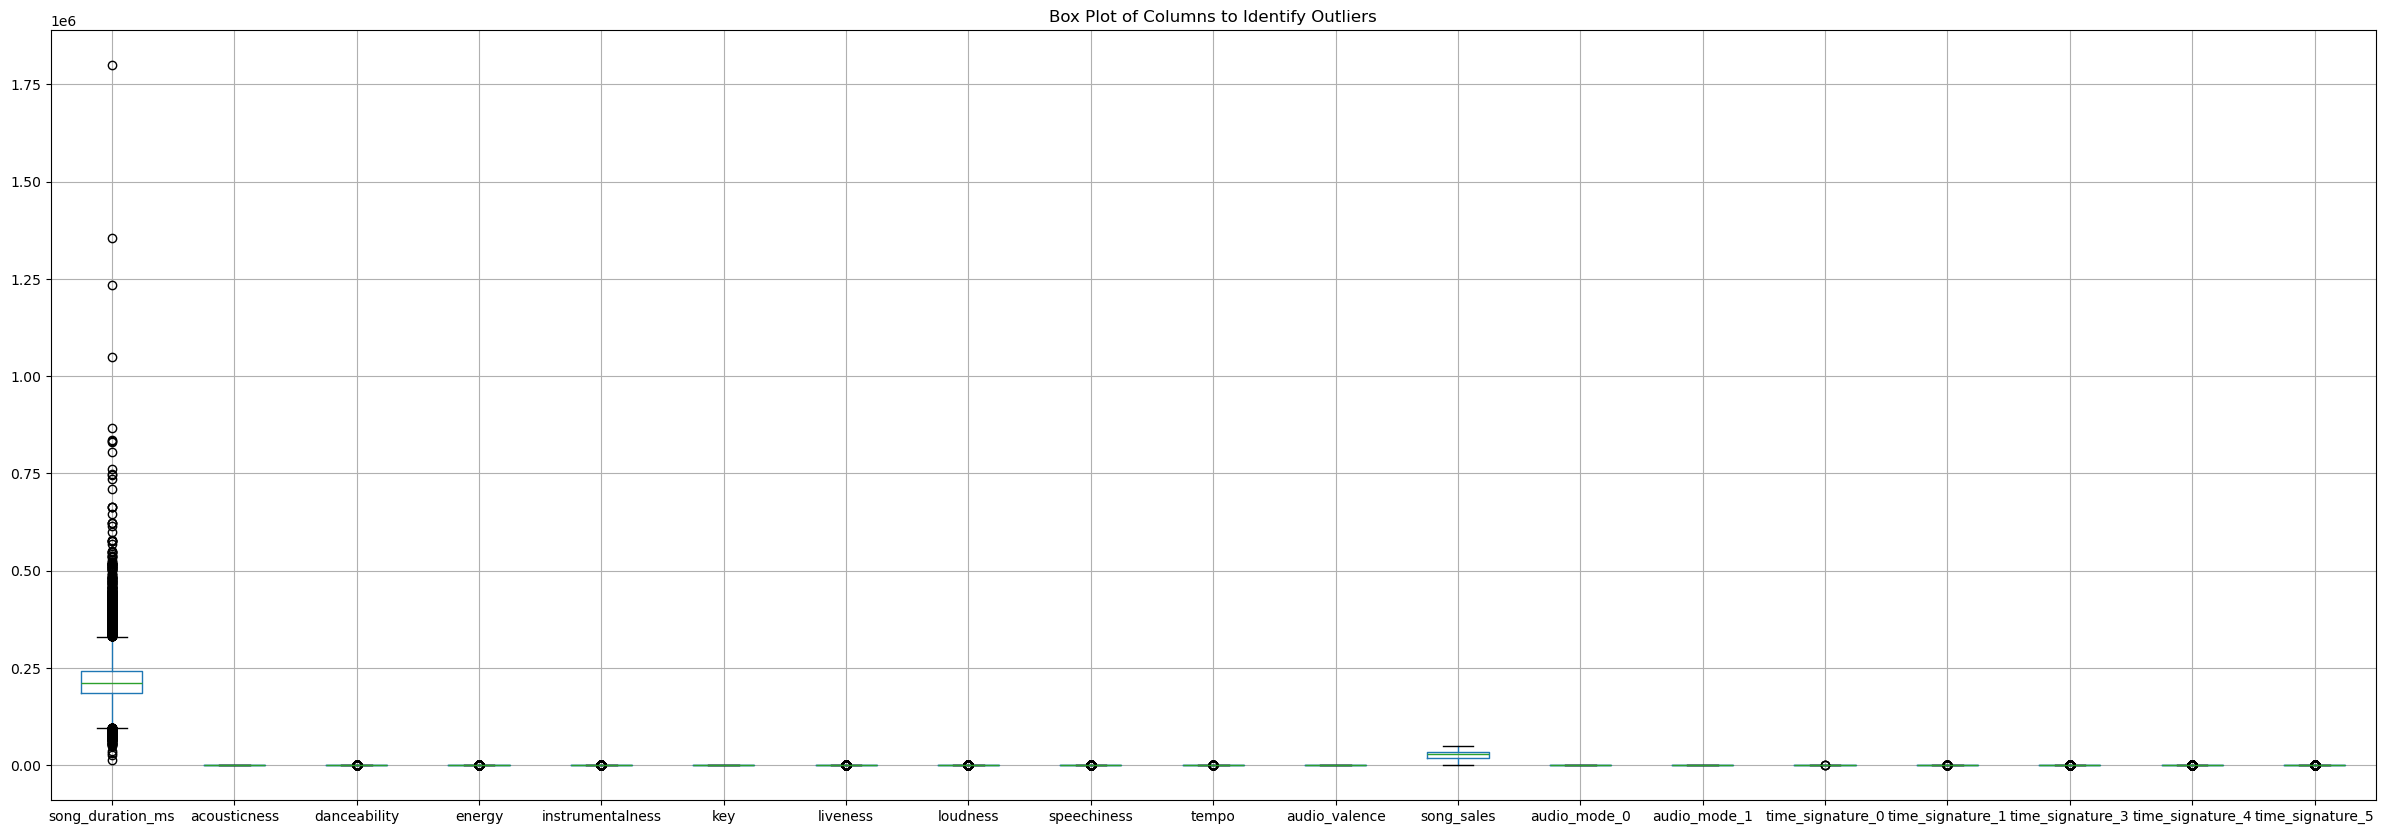

Dataset after removing outliers:


,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence,song_sales,audio_mode_0,audio_mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,262333,0.005520,0.496,0.682,0.000029,0.071622,0.0589,-4.095,0.0294,167.060,0.4740,35706.49,False,True,False,False,False,True,False
1,216933,0.010300,0.542,0.853,0.000000,0.027183,0.1080,-6.407,0.0498,105.256,0.3700,32282.58,True,False,False,False,False,True,False
3,216933,0.026400,0.451,0.970,0.003550,0.115848,0.1020,-4.938,0.1070,122.444,0.1980,36195.62,False,True,False,False,False,True,False
4,223826,0.000954,0.447,0.766,0.000000,0.070666,0.1130,-5.065,0.0313,172.011,0.5740,27391.28,False,True,False,False,False,True,False
5,235893,0.008950,0.316,0.945,0.000002,0.070454,0.3960,-3.169,0.1240,189.931,0.3200,39130.40,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,114582,0.898000,0.370,0.136,0.000263,0.107884,0.0999,-13.528,0.0433,146.081,0.0592,26902.15,False,True,False,False,False,True,False
18828,216173,0.862000,0.515,0.286,0.000069,0.083568,0.1060,-11.776,0.0378,115.076,0.2840,31304.32,False,True,False,False,False,True,False
18829,195106,0.395000,0.644,0.523,0.000000,0.070454,0.0930,-7.660,0.0378,95.966,0.4450,30326.06,False,True,False,False,False,True,False
18832,182211,0.847000,0.719,0.325,0.000000,0.115848,0.1250,-12.222,0.0355,130.534,0.2860,11249.99,False,True,False,False,False,True,False


In [11]:
# Step 1:  box plots for each column to identify outliers visually
plt.figure(figsize=(30, 10))
df.boxplot()
plt.title("Box Plot of Columns to Identify Outliers")
plt.show()

# Step 2: now we identify and remove outliers based on IQR
def remove_outliers(df):
    # For each column, calculate the IQR 
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
    
############################################################
df_cleaned = remove_outliers(df)
############################################################
print("Dataset after removing outliers:")
df_cleaned


In [12]:
df_original['time_signature'].unique()


array([4, 3, 1, 5, 0], dtype=int64)

4. Feature Relationships

In [13]:
df_cleaned = df_cleaned.drop('time_signature_0',axis=1)
import seaborn as sns
# Compute correlation matrix
corr_matrix = df_cleaned.corr()
corr_matrix


,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence,song_sales,audio_mode_0,audio_mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
song_duration_ms,1.000000,-0.095525,-0.092580,0.066959,0.063319,-0.001474,-0.018276,0.010480,-0.030841,-0.021990,-0.096838,0.027184,0.042708,-0.042708,-0.009120,0.015641,-0.003587,-0.017577
acousticness,-0.095525,1.000000,-0.117167,-0.604274,-0.019311,-0.060058,-0.065936,-0.454778,-0.159373,-0.101938,-0.030020,-0.099691,-0.080295,0.080295,0.056848,0.189117,-0.188852,0.023587
danceability,-0.092580,-0.117167,1.000000,-0.015750,-0.042759,0.043740,-0.082393,0.075217,0.260758,-0.135730,0.296728,0.115094,0.116552,-0.116552,-0.033419,-0.140888,0.162095,-0.069929
energy,0.066959,-0.604274,-0.015750,1.000000,0.020286,0.014048,0.139724,0.688179,0.129828,0.124429,0.292807,0.008239,0.061046,-0.061046,-0.044335,-0.169452,0.176520,-0.040875
instrumentalness,0.063319,-0.019311,-0.042759,0.020286,1.000000,-0.031076,-0.010943,-0.093842,-0.064919,-0.009673,-0.023297,-0.055724,0.009618,-0.009618,0.014733,-0.012114,0.006224,0.001907
key,-0.001474,-0.060058,0.043740,0.014048,-0.031076,1.000000,0.017126,0.019930,0.009168,0.002628,0.021740,0.019579,-0.149853,0.149853,-0.014486,-0.035123,0.035374,-0.002986
liveness,-0.018276,-0.065936,-0.082393,0.139724,-0.010943,0.017126,1.000000,0.079001,0.048568,0.035710,0.007880,-0.029024,0.018593,-0.018593,-0.007591,-0.011207,0.020105,-0.019029
loudness,0.010480,-0.454778,0.075217,0.688179,-0.093842,0.019930,0.079001,1.000000,0.118065,0.075261,0.078323,0.129842,0.069607,-0.069607,-0.024517,-0.097760,0.094894,-0.008677
speechiness,-0.030841,-0.159373,0.260758,0.129828,-0.064919,0.009168,0.048568,0.118065,1.000000,0.073450,-0.018952,0.049655,0.120455,-0.120455,-0.011596,-0.072703,0.040628,0.056737
tempo,-0.021990,-0.101938,-0.135730,0.124429,-0.009673,0.002628,0.035710,0.075261,0.073450,1.000000,0.019732,-0.017111,-0.011491,0.011491,-0.023911,0.015826,-0.002356,-0.012901


<Axes: >

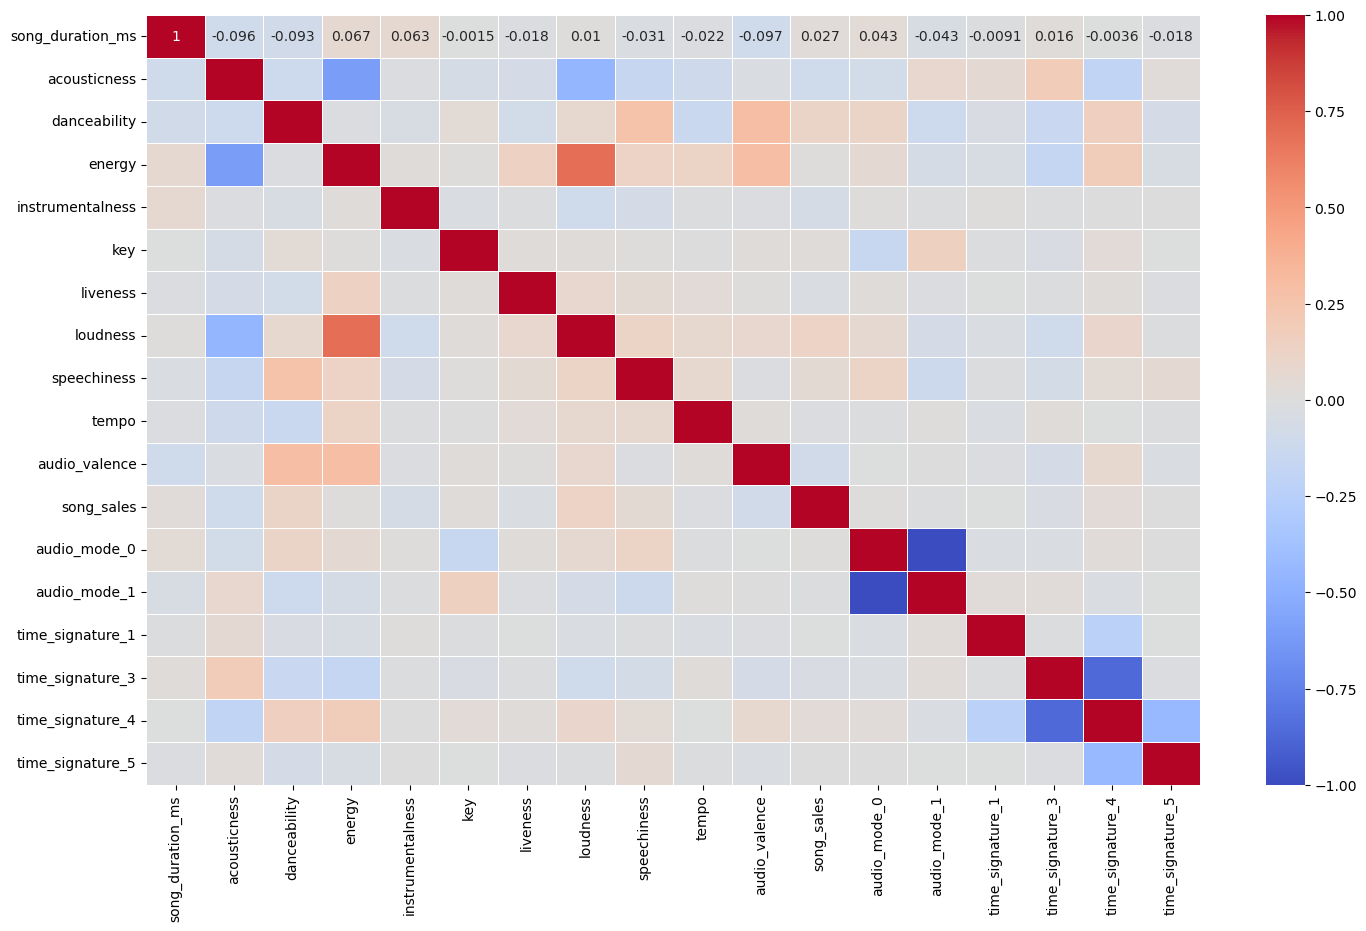

In [14]:


plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)


Multicollinearity Analysis

In [15]:
def high_cor(df):
    temp = []
    temp2 = []
    columns = df.columns
    for col in columns :
        coll = df[col].tolist()
        for entry in coll:
            if (abs(entry) > 0.5 and entry<1 ) :   # entry <1 because we dont want diagonal elements of matrix
                temp += [entry]
                
    temp = list(set(temp))           #any number appear two times so we remove repeated elements

    for target_value in temp :
        # Stack the DataFrame to convert it to a Series
        stacked = df.stack()  #simi;ar to transpose of a matrix replace columns and rows
        indices = stacked[stacked == target_value].index.tolist()  # Find the indices where the value equals the target value
        # Display the row and column names
        if indices:   #indices is boolean
            for row, col in indices:
                print(f"Value {target_value} found at row '{row}' and column '{col}'")
                
high_cor(corr_matrix)
            

Value -0.6042740920630765 found at row 'acousticness' and column 'energy'
Value -0.6042740920630765 found at row 'energy' and column 'acousticness'
Value 0.6881792071783666 found at row 'energy' and column 'loudness'
Value 0.6881792071783666 found at row 'loudness' and column 'energy'
Value -0.8623099969783264 found at row 'time_signature_3' and column 'time_signature_4'
Value -0.8623099969783264 found at row 'time_signature_4' and column 'time_signature_3'
Value -1.0000000000000002 found at row 'audio_mode_0' and column 'audio_mode_1'
Value -1.0000000000000002 found at row 'audio_mode_1' and column 'audio_mode_0'


In [16]:
df_cleaned = df_cleaned.drop(['time_signature_4','audio_mode_1'],axis=1)

In [17]:
df_cleaned['audio_mode_0'] = df_cleaned['audio_mode_0'].astype(int)
df_cleaned['time_signature_1'] = df_cleaned['time_signature_1'].astype(int)
df_cleaned['time_signature_3'] = df_cleaned['time_signature_3'].astype(int)
df_cleaned['time_signature_5'] = df_cleaned['time_signature_5'].astype(int)
df_cleaned

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence,song_sales,audio_mode_0,time_signature_1,time_signature_3,time_signature_5
0,262333,0.005520,0.496,0.682,0.000029,0.071622,0.0589,-4.095,0.0294,167.060,0.4740,35706.49,0,0,0,0
1,216933,0.010300,0.542,0.853,0.000000,0.027183,0.1080,-6.407,0.0498,105.256,0.3700,32282.58,1,0,0,0
3,216933,0.026400,0.451,0.970,0.003550,0.115848,0.1020,-4.938,0.1070,122.444,0.1980,36195.62,0,0,0,0
4,223826,0.000954,0.447,0.766,0.000000,0.070666,0.1130,-5.065,0.0313,172.011,0.5740,27391.28,0,0,0,0
5,235893,0.008950,0.316,0.945,0.000002,0.070454,0.3960,-3.169,0.1240,189.931,0.3200,39130.40,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,114582,0.898000,0.370,0.136,0.000263,0.107884,0.0999,-13.528,0.0433,146.081,0.0592,26902.15,0,0,0,0
18828,216173,0.862000,0.515,0.286,0.000069,0.083568,0.1060,-11.776,0.0378,115.076,0.2840,31304.32,0,0,0,0
18829,195106,0.395000,0.644,0.523,0.000000,0.070454,0.0930,-7.660,0.0378,95.966,0.4450,30326.06,0,0,0,0
18832,182211,0.847000,0.719,0.325,0.000000,0.115848,0.1250,-12.222,0.0355,130.534,0.2860,11249.99,0,0,0,0


Implement Linear Regression

In [18]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
import time

# 1. Linear Regression from Scratch
class LinearRegressionScratch:
    def fit(self, X, y):
        one_column = np.ones((X.shape[0], 1))                       #we add a bias term (intercept) to the input feature matrix
        X_b = np.c_[one_column, X]  # Add x0 = 1 for bias
        self.theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)     # we calculate the coefficients using the normal equation

    def predict(self, X):
        one_column =np.ones((X.shape[0], 1))  # again we add a bias term(one column)
        X_b = np.c_[one_column, X]  
        return X_b.dot(self.theta_best)
##########################################################################################################
X = df_cleaned.drop(columns=['song_sales'])  
y = df_cleaned['song_sales']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit the model using Linear Regression from Scratch
lr_scratch = LinearRegressionScratch()
###############################################################
start_time = time.time()  # Start the timer
lr_scratch.fit(X_train, y_train)
train_time_scratch = time.time() - start_time  # Calculate training time
###########################################################################
# 4. Predictions
y_pred_scratch = lr_scratch.predict(X_test)

# 5. Fit the model using Scikit-learn
lr_sklearn = SklearnLinearRegression()
###############################################################
start_time = time.time()  # Start the timer
lr_sklearn.fit(X_train, y_train)
train_time_sklearn = time.time() - start_time  # Calculate training time
###########################################################################
# 6. Predictions
y_pred_sklearn = lr_sklearn.predict(X_test)

# 7. Performance comparison
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_scratch = calculate_rmse(y_test, y_pred_scratch)
rmse_sklearn = calculate_rmse(y_test, y_pred_sklearn)

# 8. Displaying the results
print(f"Scratch Linear Regression RMSE: {rmse_scratch:.4f}, Time taken: {train_time_scratch:.4f} seconds")
print(f"Scikit-learn Linear Regression RMSE: {rmse_sklearn:.4f}, Time taken: {train_time_sklearn:.4f} seconds")


Scratch Linear Regression RMSE: 10126.6851, Time taken: 0.0164 seconds
Scikit-learn Linear Regression RMSE: 10126.6851, Time taken: 0.0140 seconds


Lasso And Ridge

lasso and ridge need data to be normalized!

In [19]:
def min_max_normalize(X):
    min_values = np.min(X, axis=0)
    max_values = np.max(X, axis=0)
    
    # for all features
    X_normalized = (X - min_values) / (max_values - min_values)
    return X_normalized

dff = df_cleaned.copy()

X = dff.drop(columns=['song_sales']).values  # 'song_sales' is the target variable
X_normalized = min_max_normalize(X)

feature_columns = dff.columns.drop('song_sales')  # feature column names
dff[feature_columns] = X_normalized  #finally we replace original values with normalized values

dff

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence,song_sales,audio_mode_0,time_signature_1,time_signature_3,time_signature_5
0,0.709041,0.005601,0.361842,0.663884,0.008258,0.501198,0.113499,0.710929,0.027603,0.803447,0.463666,35706.49,0.0,0.0,0.0,0.0
1,0.514057,0.010454,0.422368,0.846928,0.000000,0.000000,0.232070,0.536793,0.108044,0.386543,0.354296,32282.58,1.0,0.0,0.0,0.0
3,0.514057,0.026799,0.302632,0.972169,0.997191,1.000000,0.217580,0.647435,0.333596,0.502486,0.173415,36195.62,0.0,0.0,0.0,0.0
4,0.543661,0.000965,0.297368,0.753800,0.000000,0.490419,0.244144,0.637870,0.035095,0.836844,0.568830,27391.28,0.0,0.0,0.0,0.0
5,0.595486,0.009083,0.125000,0.945408,0.000520,0.488024,0.927554,0.780673,0.400631,0.957725,0.301714,39130.40,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,0.074480,0.911675,0.196053,0.079426,0.073876,0.910180,0.212509,0.000452,0.082413,0.661931,0.027448,26902.15,0.0,0.0,0.0,0.0
18828,0.510793,0.875126,0.386842,0.239991,0.019382,0.635928,0.227240,0.132409,0.060726,0.452784,0.263855,31304.32,0.0,0.0,0.0,0.0
18829,0.420314,0.401013,0.556579,0.493684,0.000000,0.488024,0.195846,0.442419,0.060726,0.323876,0.433169,30326.06,0.0,0.0,0.0,0.0
18832,0.364933,0.859898,0.655263,0.281738,0.000000,1.000000,0.273122,0.098818,0.051656,0.557058,0.265959,11249.99,0.0,0.0,0.0,0.0


In [20]:

class RidgeRegressionScratch:
    def __init__(self, alpha=0.4):
        self.alpha = alpha  # regularization strength

    def fit(self, X, y): 
        one_column = np.ones((X.shape[0], 1))
        X_b = np.c_[one_column, X]  
        
        # calculating the coefficients using the normal equation with regularization:
        n = X_b.shape[1]  #n is number of features
        I = np.eye(n)    # I is identity matrix
        I[0, 0] = 0  # we must not regularize the intercept term

        self.theta_best = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * I).dot(X_b.T).dot(y)    #np.linalg: collection of linear aljebra muduls
        # np.linalg.inv : invers of a matrix or operator 

    def predict(self, X):
        one_column = np.ones((X.shape[0], 1))
        X_b = np.c_[one_column, X] 
        return X_b.dot(self.theta_best)

    
class LassoRegressionScratch:
    def __init__(self, alpha=0.4, n_iterations=1000, tolerance=1e-4):
        self.alpha = alpha  
        self.n_iterations = n_iterations
        self.tolerance = tolerance

    def fit(self, X, y):
        one_column = np.ones((X.shape[0], 1))
        X_b = np.c_[one_column, X]  # first; add x0 = 1 for bias
        
        self.theta_best = np.zeros(X_b.shape[1]) # initialize coefficients
        
        # coordinate descent algorithm
        for i in range(self.n_iterations):      #n_iteration is given 
            theta_old = self.theta_best.copy()
            for j in range(len(self.theta_best)):
                # now we compute the partial derivative
                if j == 0:  # intercept term (not regularized)
                    self.theta_best[j] = np.sum(y - X_b.dot(self.theta_best) + X_b[:, j] * self.theta_best[j]) / len(y)
                else:
                    rho = np.dot(X_b[:, j], y - X_b.dot(self.theta_best) + self.theta_best[j] * X_b[:, j])
                    self.theta_best[j] = np.sign(rho) * max(0, abs(rho) - self.alpha) / len(y)
            
            # checking for convergence
            if np.sum(np.abs(self.theta_best - theta_old)) < self.tolerance:
                break

    def predict(self, X):
        one_column = np.ones((X.shape[0], 1))
        X_b = np.c_[one_column, X]  
        return X_b.dot(self.theta_best)
##############################################################################################################################
X = dff.drop(columns=['song_sales'])  
y = dff['song_sales']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit the model using Linear Regression from Scratch
ridge = RidgeRegressionScratch()
###############################################################
start_time = time.time()  # Start the timer
ridge.fit(X_train, y_train)
train_time_ridge = time.time() - start_time  # Calculate training time
###########################################################################
# 4. Predictions
y_pred_ridge = ridge.predict(X_test)

# 5. Fit the model using Scikit-learn
lasso = LassoRegressionScratch()
###############################################################
start_time = time.time()  # Start the timer
lasso.fit(X_train, y_train)
train_time_lasso = time.time() - start_time  # Calculate training time
###########################################################################
# 6. Predictions
y_pred_lasso = lasso.predict(X_test)

# 7. Performance comparison
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_ridge = calculate_rmse(y_test, y_pred_ridge)
rmse_lasso = calculate_rmse(y_test, y_pred_lasso)
##################################################################
def calculate_r2(y_true, y_pred):
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)           # Calculate the total sum of squares
    
    ss_res = np.sum((y_true - y_pred) ** 2)     # Calculate the residual sum of squares
    r2_score = 1 - (ss_res / ss_tot)
    return r2_score                                 # Calculate R^2
r2_ridge = calculate_r2(y_test, y_pred_ridge)
r2_lasso = calculate_r2(y_test, y_pred_lasso)

# 8. Displaying the results
print(f"Ridge Linear Regression RMSE: {rmse_ridge:.3f},r^2:{r2_ridge:.3f}, Time taken: {train_time_scratch:.3f} seconds")
print(f"Lasso Linear Regression RMSE: {rmse_lasso:.3f},r^2:{r2_lasso:.3f}, Time taken: {train_time_sklearn:.3f} seconds")


Ridge Linear Regression RMSE: 10126.335,r^2:0.046, Time taken: 0.016 seconds
Lasso Linear Regression RMSE: 10343.789,r^2:0.005, Time taken: 0.014 seconds


In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

# Extract features (X) and target (y)
X = df_cleaned.drop(columns=['song_sales']) 
y = df_cleaned['song_sales'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a dictionary to store the results for each model
results = {}

######################################################################################
# 2. Ridge Regression
start_time = time.time()
ridge = Ridge(alpha=1.0)  #  can adjust alpha to control regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
results['Ridge'] = {'RMSE': rmse_ridge, 'Time': time.time() - start_time}
##############################################################################
# 3. Lasso Regression
start_time = time.time()
lasso = Lasso(alpha=0.8)  #  can adjust alpha ...
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
results['Lasso'] = {'RMSE': rmse_lasso, 'Time': time.time() - start_time}
#######################################################################################
# Displaying the results
for model, metrics in results.items():
    print(f"{model} Regression - RMSE: {metrics['RMSE']:.4f}, Time taken: {metrics['Time']:.4f} seconds")


Ridge Regression - RMSE: 10137.2332, Time taken: 0.0151 seconds
Lasso Regression - RMSE: 10136.6535, Time taken: 0.0342 seconds


8. overfitting check

In [22]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Define cross-validated Ridge regression model
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X_train, y_train)
ridge_y_pred = ridge_cv.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))

# Define cross-validated Lasso regression model
lasso_cv = LassoCV(alphas=[0.1, 0.01, 0.001], cv=5)
lasso_cv.fit(X_train, y_train)
lasso_y_pred = lasso_cv.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))

print(f"Ridge Regression with CV - RMSE: {ridge_rmse:.4f}")
print(f"Lasso Regression with CV - RMSE: {lasso_rmse:.4f}")


Ridge Regression with CV - RMSE: 10132.8206
Lasso Regression with CV - RMSE: 10126.9385


9.Target Intervals for Sales:

In [23]:
dff

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence,song_sales,audio_mode_0,time_signature_1,time_signature_3,time_signature_5
0,0.709041,0.005601,0.361842,0.663884,0.008258,0.501198,0.113499,0.710929,0.027603,0.803447,0.463666,35706.49,0.0,0.0,0.0,0.0
1,0.514057,0.010454,0.422368,0.846928,0.000000,0.000000,0.232070,0.536793,0.108044,0.386543,0.354296,32282.58,1.0,0.0,0.0,0.0
3,0.514057,0.026799,0.302632,0.972169,0.997191,1.000000,0.217580,0.647435,0.333596,0.502486,0.173415,36195.62,0.0,0.0,0.0,0.0
4,0.543661,0.000965,0.297368,0.753800,0.000000,0.490419,0.244144,0.637870,0.035095,0.836844,0.568830,27391.28,0.0,0.0,0.0,0.0
5,0.595486,0.009083,0.125000,0.945408,0.000520,0.488024,0.927554,0.780673,0.400631,0.957725,0.301714,39130.40,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,0.074480,0.911675,0.196053,0.079426,0.073876,0.910180,0.212509,0.000452,0.082413,0.661931,0.027448,26902.15,0.0,0.0,0.0,0.0
18828,0.510793,0.875126,0.386842,0.239991,0.019382,0.635928,0.227240,0.132409,0.060726,0.452784,0.263855,31304.32,0.0,0.0,0.0,0.0
18829,0.420314,0.401013,0.556579,0.493684,0.000000,0.488024,0.195846,0.442419,0.060726,0.323876,0.433169,30326.06,0.0,0.0,0.0,0.0
18832,0.364933,0.859898,0.655263,0.281738,0.000000,1.000000,0.273122,0.098818,0.051656,0.557058,0.265959,11249.99,0.0,0.0,0.0,0.0


In [24]:
dataframe = dff.copy()

In [25]:
dataframe['intervals'] = dataframe['song_sales']/10000

In [26]:
def classify(value):
    if 0 <= value <= 1:
        return 'worst_seller'
    elif 4 <= value <= 5:
        return 'best_seller'
    else :
        return value

dataframe['intervals'] = dataframe['intervals'].apply(classify)
dataframe

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,audio_valence,song_sales,audio_mode_0,time_signature_1,time_signature_3,time_signature_5,intervals
0,0.709041,0.005601,0.361842,0.663884,0.008258,0.501198,0.113499,0.710929,0.027603,0.803447,0.463666,35706.49,0.0,0.0,0.0,0.0,3.570649
1,0.514057,0.010454,0.422368,0.846928,0.000000,0.000000,0.232070,0.536793,0.108044,0.386543,0.354296,32282.58,1.0,0.0,0.0,0.0,3.228258
3,0.514057,0.026799,0.302632,0.972169,0.997191,1.000000,0.217580,0.647435,0.333596,0.502486,0.173415,36195.62,0.0,0.0,0.0,0.0,3.619562
4,0.543661,0.000965,0.297368,0.753800,0.000000,0.490419,0.244144,0.637870,0.035095,0.836844,0.568830,27391.28,0.0,0.0,0.0,0.0,2.739128
5,0.595486,0.009083,0.125000,0.945408,0.000520,0.488024,0.927554,0.780673,0.400631,0.957725,0.301714,39130.40,1.0,0.0,0.0,0.0,3.91304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,0.074480,0.911675,0.196053,0.079426,0.073876,0.910180,0.212509,0.000452,0.082413,0.661931,0.027448,26902.15,0.0,0.0,0.0,0.0,2.690215
18828,0.510793,0.875126,0.386842,0.239991,0.019382,0.635928,0.227240,0.132409,0.060726,0.452784,0.263855,31304.32,0.0,0.0,0.0,0.0,3.130432
18829,0.420314,0.401013,0.556579,0.493684,0.000000,0.488024,0.195846,0.442419,0.060726,0.323876,0.433169,30326.06,0.0,0.0,0.0,0.0,3.032606
18832,0.364933,0.859898,0.655263,0.281738,0.000000,1.000000,0.273122,0.098818,0.051656,0.557058,0.265959,11249.99,0.0,0.0,0.0,0.0,1.124999


In [27]:
dataframe['intervals'].tolist()

[3.570649,
 3.2282580000000003,
 3.619562,
 2.739128,
 3.91304,
 3.961953,
 3.7173879999999997,
 3.91304,
 3.815214,
 3.961953,
 3.374997,
 3.7663010000000003,
 3.4728230000000004,
 3.032606,
 3.7663010000000003,
 3.864127,
 3.864127,
 'worst_seller',
 3.032606,
 3.864127,
 1.369564,
 3.815214,
 3.4728230000000004,
 3.7663010000000003,
 3.179345,
 3.668475,
 3.619562,
 3.619562,
 'worst_seller',
 3.570649,
 3.619562,
 3.864127,
 3.42391,
 2.93478,
 3.570649,
 2.7880409999999998,
 3.4728230000000004,
 3.0815189999999997,
 3.4728230000000004,
 2.983693,
 3.521736,
 3.4728230000000004,
 3.42391,
 3.179345,
 3.374997,
 'best_seller',
 'best_seller',
 2.8858669999999997,
 3.570649,
 'best_seller',
 'best_seller',
 3.570649,
 'best_seller',
 2.983693,
 'best_seller',
 2.7880409999999998,
 2.152172,
 2.298911,
 2.641302,
 2.298911,
 3.179345,
 2.5434759999999996,
 3.179345,
 3.7663010000000003,
 'best_seller',
 'best_seller',
 3.619562,
 3.7663010000000003,
 2.201085,
 2.5434759999999996,
 1.